In [36]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.lines import Line2D

Load CSVs 

In [37]:

#os.chdir('C:/Users/marce/OneDrive/Desktop/UZH/Network Science/newRpeo/UZH_Network')

study_programs = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
modules = pd.read_csv("data/csv/HS24/VVZ_HS24_modules.csv",encoding="utf-16")
time_schedule = pd.read_csv("data/csv/HS24/VVZ_HS24_joined_time_schedule.csv")

Shows Heads

In [38]:
study_programs.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)


In [39]:
modules.head()

,Name,Faculty,Number,Type,ECTS,Responsible instructor,Prerequisites,Prior Knowledge,Assessment,Grading Scale,Repeatability,Offer pattern,Booking Deadline/Period,Cancellation Deadline
0,BIO 780 Museum Internship,MNF,BIO780,Praktikum,4,Caroline Sonja Weckerle,This module is open for students of the Mono o...,NaN,"Final report or product, graded. In English or...","1-6, Half Grades Given",Can't be repeated,1 Semester (Every Semester),not bookable,not cancelable
1,Research Seminar: Political Communication,PHF,249-700,Module,18,Thomas Zerback,Multivariate Statistik erfolgreich absolviert,NaN,Portfolio,"1-6, Half Grades Given","repeatable once, book again",2 Semesters (Begins in Spring Semester),NaN,NaN
2,Fundamental Texts in Romance Linguistics,PHF,430-003,Module,6,Johannes Kabatek,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
3,Fundamental Texts in French Linguistics,PHF,430-004,Module,3,Martin-Dietrich Glessgen,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
4,Fundamental Texts in Italian Linguistics,PHF,430-005,Module,3,Michele Loporcaro,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00


In [52]:
n = 2500
time_schedule.iloc[n:n+5,]


,Event Name,Event Code,Event Type,Instructor,Course Languages,Component of Module,Weekday,Daytime,Start Time,End Time,Components
2500,Evolutionäre Anthropologie,BIO133.1,Lecture with Practical Exercises,"Judith Maria Burkart, Michael Krützen, Andrea ...","German, English",BIO 133 Anthropology,Wednesday,Morning,8.00,9.75,Single Major 180 Biodiversity---Bachelor of Sc...
2501,Form und Funktion der Pflanzen (Vorlesung),BIO131.1,Lecture with Practical Exercises,"Emilie Demarsy, Beat Keller, Christoph Ringli,...",German,BIO 131 Form and Function of Plants,Wednesday,Morning,10.25,12.00,Single Major 180 Biodiversity---Bachelor of Sc...
2502,Rechnergestützte Datenauswertung,200-101a,Course,Thomas Welchowski,German,Computational Data Analysis,Wednesday,Afternoon,16.25,18.00,Major 120 Psychology---Bachelor of Science in ...
2503,Kognitionspsychologie 2,200-200a,Course,Klaus Oberauer,German,Cognition 2,Wednesday,Morning,10.25,12.00,Major 120 Educational Science and Psychology--...
2504,"GGP.S410.2 Grundkurs Geschichte 1, Gruppe 2",600x410a,PHZH SEK I Module,Kijan Espahangizi,German,GGP.S410: Basic Course History 1,Wednesday,Morning,10.25,12.00,NaN


Tuesday Afternoon
Thursday Afternoon
Thursday Morning
Monday Afternoon
Monday Afternoon
0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
Number of nodes: 5
Number of edges: 4


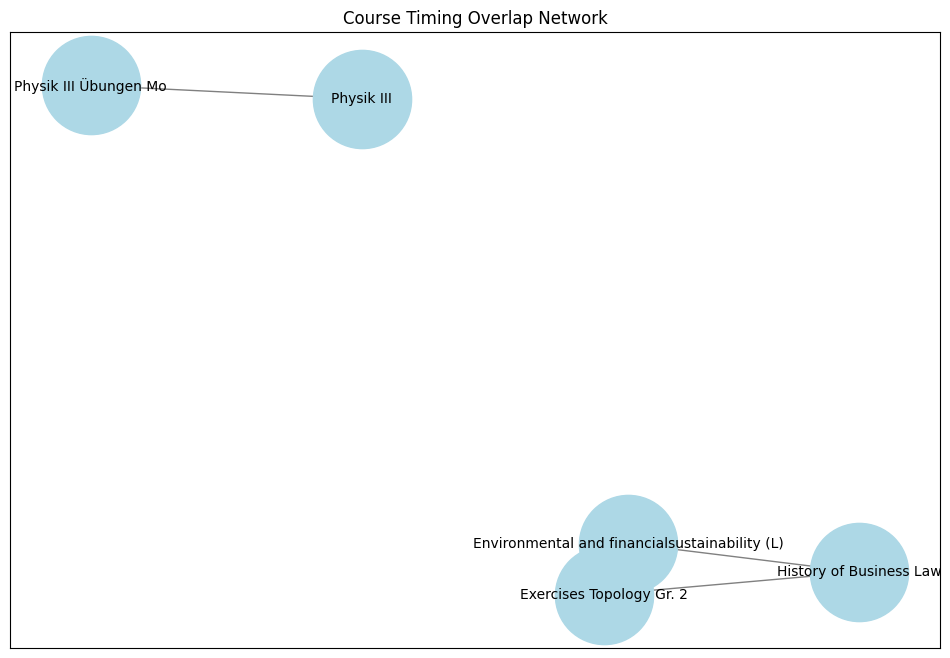

Top 5 Courses by Degree Centrality:
Environmental and financialsustainability (L): 0.50
History of Business Law: 0.50
Exercises Topology Gr. 2: 0.50
Physik III Übungen Mo: 0.25
Physik III: 0.25


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

n = 10   # Set number of modules compared
filtered_df = time_schedule.dropna(subset=['Weekday', 'Daytime'])

filtered_df = filtered_df.iloc[-n:]

time_overlap_graph = nx.Graph()

n_iter = 0
length_df = len(filtered_df)
nums = []
for _, row in list(filtered_df.head(5).iterrows()):
    print(row['Weekday'], row['Daytime'])

for _, course1 in filtered_df.iterrows():
    num = (int((n_iter/length_df)* 100))
    if num % 5 == 0:
        if num not in nums:
            print(num,'%')
            nums.append(num)
    n_iter += 1
        
    for _, course2 in filtered_df.iterrows():
        
        if course1['Event Code'] != course2['Event Code']:  
            if (
                course1['Weekday'] == course2['Weekday'] and
                course1['Daytime'] == course2['Daytime']
            ):
               
                time_overlap_graph.add_edge(
                    course1['Event Name'],  
                    course2['Event Name']
                )
                

print(f"Number of nodes: {time_overlap_graph.number_of_nodes()}")
print(f"Number of edges: {time_overlap_graph.number_of_edges()}")

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(time_overlap_graph, seed=42) 
nx.draw_networkx(
    time_overlap_graph, pos,
    with_labels=True, node_size=5000, font_size=10,
    node_color='lightblue', edge_color='gray'
)
plt.title("Course Timing Overlap Network")
plt.show()
degree_centrality = nx.degree_centrality(time_overlap_graph)
print("Top 5 Courses by Degree Centrality:")
top_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for course, centrality in top_centrality:
    print(f"{course}: {centrality:.2f}")


**Time Overlap Graph with weighted edges**


Define function for creating graph out of last N events:

In [53]:

import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from matplotlib.lines import Line2D
import os
import pandas as pd

def create_weighted_time_overlap_graph(max_n=10000, semester = 'HS24', study_program ='', weekday='', node_size = 4, perc=False):
    n = max_n  #n of events to check

    def calculate_time_overlap(start1, end1, start2, end2):    #helper function to calculate overlap (in minutes)
        overlap = max(0, min(end1, end2) - max(start1, start2)) * 60  # minutes
        return overlap
    
    #load time schedule csv into df
    os.chdir('C:/Users/marce/OneDrive/Desktop/UZH/Network Science/newRpeo/UZH_Network') #adjust path 
    time_schedule = pd.read_csv(f"data/csv/{semester}/VVZ_{semester}_joined_time_schedule.csv")

    # filter rows 
    filtered_df = time_schedule.dropna(subset=['Weekday', 'Start Time', 'End Time'])
    filtered_df = filtered_df[filtered_df['Weekday'].str.contains(weekday, regex=False)]
    filtered_df = filtered_df[filtered_df['Components'].str.contains(study_program, na=False, regex=False)]
    filtered_df = filtered_df.iloc[-min(len(filtered_df), n):]

    # create the graph
    time_overlap_graph = nx.Graph()

    n_iter = 0
    length_df = len(filtered_df)
    nums = []

    # add edges with weights dependent on time overlap
    for _, course1 in filtered_df.iterrows():
        num = int((n_iter / length_df) * 100)
        if num % 5 == 0:
            if num not in nums:
                if perc:
                    print(num, '%')
                nums.append(num)
        n_iter += 1

        for _, course2 in filtered_df.iterrows():
            if course1['Event Code'] != course2['Event Code'] and course1['Weekday'] == course2['Weekday']:
                # calculates overlap
                overlap = calculate_time_overlap(course1['Start Time'], course1['End Time'],
                                                 course2['Start Time'], course2['End Time'])
                if overlap > 0:
                    time_overlap_graph.add_edge(course1['Event Name'], course2['Event Name'], weight=overlap)

    # grousp nodes by weekday
    weekday_clusters = defaultdict(list)
    for _, row in filtered_df.iterrows():
        weekday_clusters[row['Weekday']].append(row['Event Name'])


    node_sizes = [v * node_size for v in dict(time_overlap_graph.degree(weight="weight")).values()] # compute weigted degree for node sizes

    edge_widths = [d["weight"] / 60 for (_, _, d) in time_overlap_graph.edges(data=True)]

    weekday_colors = {#colours
        "Monday": "red",
        "Tuesday": "blue",
        "Wednesday": "green",
        "Thursday": "purple",
        "Friday": "orange",
    }
    node_colors = [
        weekday_colors.get(filtered_df.loc[filtered_df['Event Name'] == node, 'Weekday'].values[0], "gray")
        for node in time_overlap_graph.nodes()
    ]

    pos = nx.spring_layout(time_overlap_graph, k=0.5, seed = 42, iterations = 50)
    plt.figure(figsize=(16, 12))
    nx.draw_networkx_nodes(
        time_overlap_graph, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8
    )
    nx.draw_networkx_edges(
        time_overlap_graph, pos, width=edge_widths, alpha=0.7, edge_color="gray"
    )

    if weekday:
        nx.draw_networkx_labels(
            time_overlap_graph, pos, font_size=10, font_color="black"
        )

        #edge labels (overlap times)
        weights = nx.get_edge_attributes(time_overlap_graph, "weight")
        nx.draw_networkx_edge_labels(
            time_overlap_graph, pos, edge_labels={k: f"{v:.1f} min" for k, v in weights.items()}, font_size=8)

    else:
        # weekday labels
        cluster_centroids = {}  #centroids for debugging
        shift = 0.08
        for day_of_week, nodes in weekday_clusters.items():
            x_coords = [pos[node][0] for node in nodes if node in pos]
            y_coords = [pos[node][1] for node in nodes if node in pos]

            if x_coords and y_coords:
                centroid_x = (sum(x_coords) / len(x_coords)) + shift
                centroid_y = (sum(y_coords) / len(y_coords)) + shift
                plt.text(centroid_x, centroid_y, day_of_week, fontsize=10, fontweight='bold', color='black')

    # legend for no weekday filter
    legend_elements = [
        Line2D([0], [0], marker="o", color="w", label=day, markerfacecolor=color, markersize=10)
        for day, color in weekday_colors.items()
    ]

    if not weekday:        
        plt.legend(handles=legend_elements, loc="upper left", title="Weekdays")
    plt.title(f"Weighted Course Timing Overlap Network ({study_program if study_program else ''} {semester} - {(f'Weekday: {weekday}') if weekday else ''})")
    plt.show()

    # graph info
    print('Length DF: ', len(filtered_df))
    print('Number of nodes: ', time_overlap_graph.number_of_nodes())
    print('Number of edges: ', time_overlap_graph.number_of_edges())

    node_strength = dict(time_overlap_graph.degree(weight='weight'))
    sorted_strength = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)

    print('Courses with highest weighted degrees:\n')
    for i in range(min(5, len(sorted_strength))):
        print(f"Course: {sorted_strength[i][0]} - Total Overlap Time: {sorted_strength[i][1]}")


    # Normalised Weighted Degree Centrality
    weighted_degrees = dict(time_overlap_graph.degree(weight="weight"))
    total_weight = sum(weighted_degrees.values())  #normalized by the total weight
    weighted_degree_centrality = {node: weighted_degrees[node] / total_weight for node in weighted_degrees}
    sorted_weighted_degree_centrality = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)

    print("\nTop 5 Courses by Weighted Degree Centrality:")
    for i in range(min(5, len(sorted_weighted_degree_centrality))):
        print(f"Course: {sorted_weighted_degree_centrality[i][0]} - Weighted Degree Centrality: {sorted_weighted_degree_centrality[i][1]:.4f}")


    def weighted_clustering_coefficient(graph):
        clustering_coefficients = {}
        for i in graph.nodes:
            neighbors = list(graph.neighbors(i))
            num_neighbors = len(neighbors)

            # nodes with less than 2 neigbours dont have a ci
            if num_neighbors < 2:
                clustering_coefficients[i] = 0
                continue

            numerator = 0
            denominator = 0

            #iterate through unique pairs of neighbors (j, k) with j < k
            for idx, j in enumerate(neighbors):
                for k in neighbors[idx + 1:]:  # Only consider pairs j < k
                    w_ij = graph[i][j]["weight"] if graph.has_edge(i, j) else 0
                    w_ik = graph[i][k]["weight"] if graph.has_edge(i, k) else 0
                    a_jk = 1 if graph.has_edge(j, k) else 0
                    w_jk = graph[j][k]["weight"] if a_jk == 1 else 0

                    #updates numerator only considers fully connected triangles)
                    numerator += w_ij * w_ik * w_jk * a_jk
                    #update denominator
                    if a_jk == 1:
                        #includes w_jk if neighbors are connected
                        denominator += w_ij * w_ik * w_jk
                    else:
                        #excludes w_jk if neighbors are not connected
                        denominator += w_ij * w_ik

            #clustering coefficient for node i
            clustering_coefficients[i] = numerator / denominator if denominator != 0 else 0

        return clustering_coefficients
    clustering = weighted_clustering_coefficient(time_overlap_graph)
    sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

    print("\nTop 5 Nodes by Weighted Clustering Coefficient:")
    for i in range(min(5, len(sorted_clustering))):
        print(f"Node: {sorted_clustering[i][0]} - Clustering Coefficient: {sorted_clustering[i][1]:.4f}")


    weighted_degree_centrality_values = list(weighted_degree_centrality.values())

    plt.figure(figsize=(10, 6))
    plt.hist(weighted_degree_centrality_values, bins=30, color="lightgreen", edgecolor="black")
    plt.title("Weighted Degree Centrality Distribution")
    plt.xlabel("Weighted Degree Centrality")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


    clustering_values = list(clustering.values()) #clustering coef histogram
    plt.figure(figsize=(10, 6))
    plt.hist(clustering_values, bins=30, color="lightblue", edgecolor="black")
    plt.title("Weighted Clustering Coefficient Distribution")
    plt.xlabel("Weighted Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.show()

    edge_weights = [d["weight"] for _, _, d in time_overlap_graph.edges(data=True)] #Weighted Edge Distribution
    plt.figure(figsize=(10, 6))
    plt.hist(edge_weights, bins=30, color="salmon", edgecolor="black")
    plt.title("Weighted Edge Distribution")
    plt.xlabel("Overlap Time (Minutes)")
    plt.ylabel("Frequency")
    plt.show()



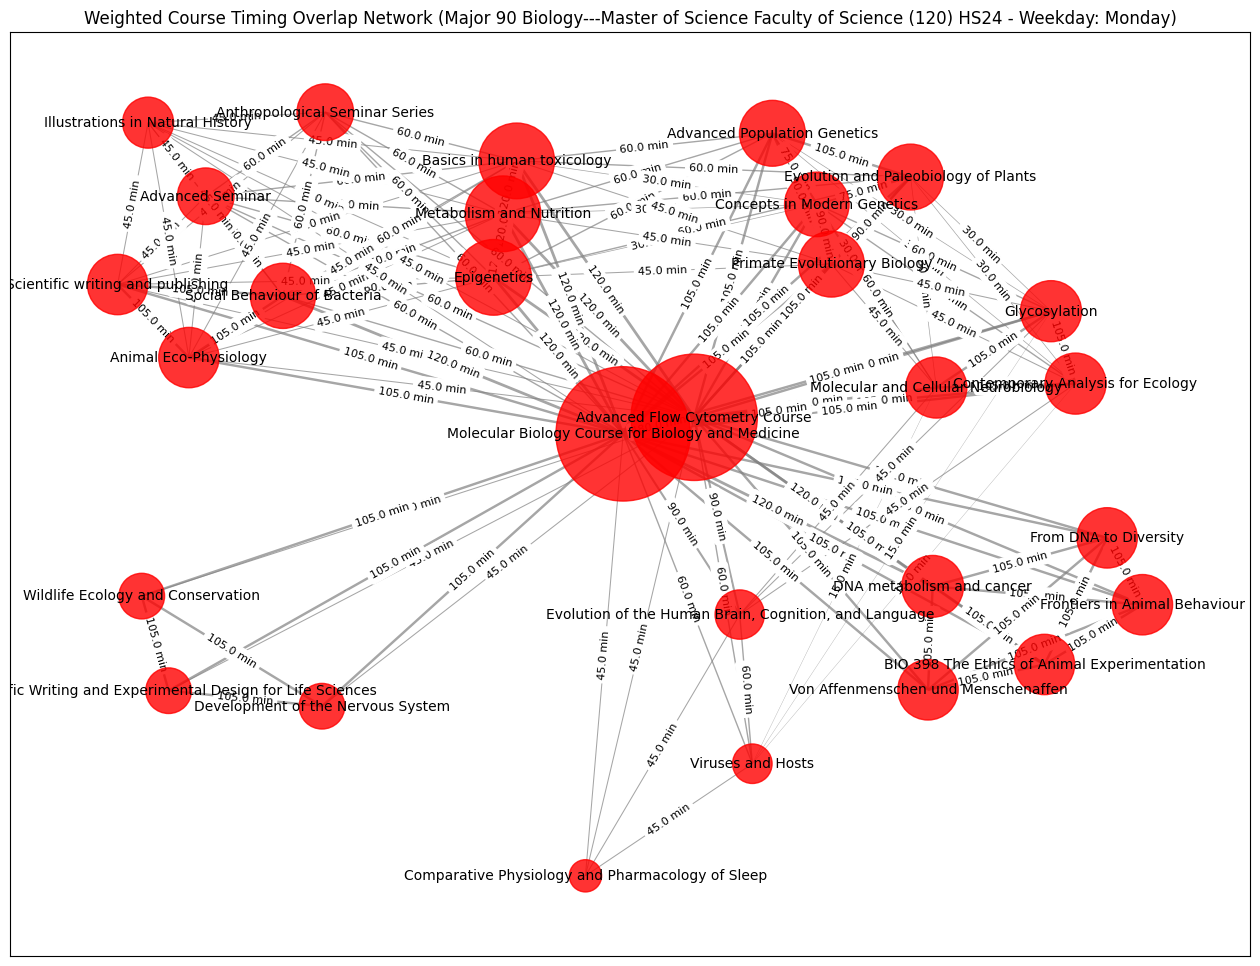

Length DF:  30
Number of nodes:  29
Number of edges:  146
Courses with highest weighted degrees:

Course: Molecular Biology Course for Biology and Medicine - Total Overlap Time: 3120.0
Course: Advanced Flow Cytometry Course - Total Overlap Time: 2760.0
Course: Epigenetics - Total Overlap Time: 990.0
Course: Metabolism and Nutrition - Total Overlap Time: 990.0
Course: Basics in human toxicology - Total Overlap Time: 990.0

Top 5 Courses by Weighted Degree Centrality:
Course: Molecular Biology Course for Biology and Medicine - Weighted Degree Centrality: 0.1390
Course: Advanced Flow Cytometry Course - Weighted Degree Centrality: 0.1230
Course: Epigenetics - Weighted Degree Centrality: 0.0441
Course: Metabolism and Nutrition - Weighted Degree Centrality: 0.0441
Course: Basics in human toxicology - Weighted Degree Centrality: 0.0441

Top 5 Nodes by Weighted Clustering Coefficient:
Node: Advanced Seminar - Clustering Coefficient: 1.0000
Node: Scientific writing and publishing - Clustering C

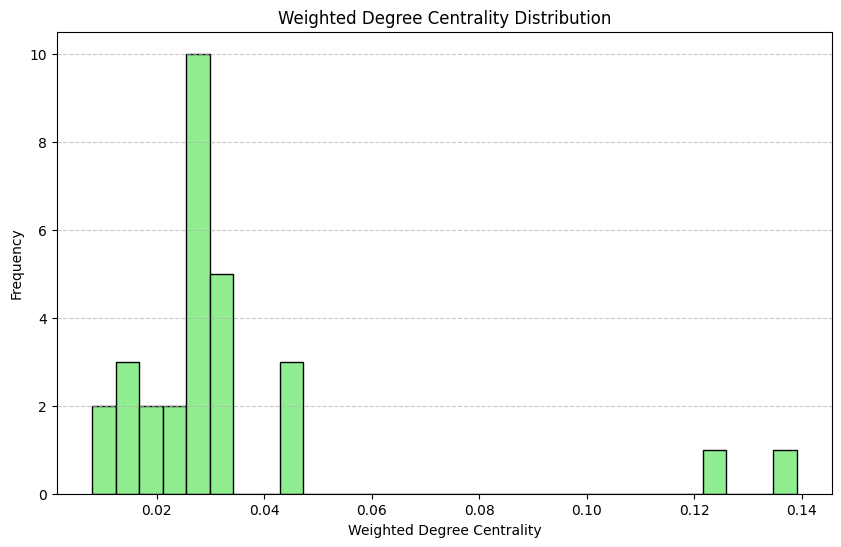

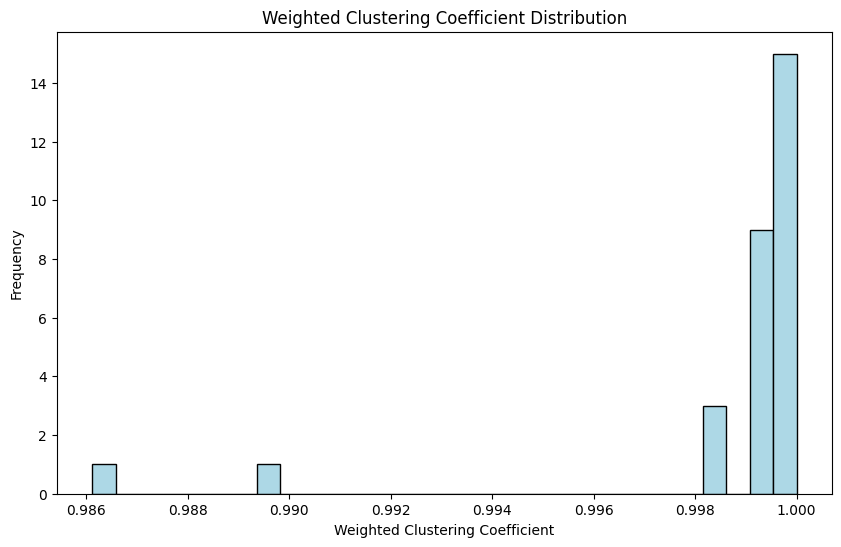

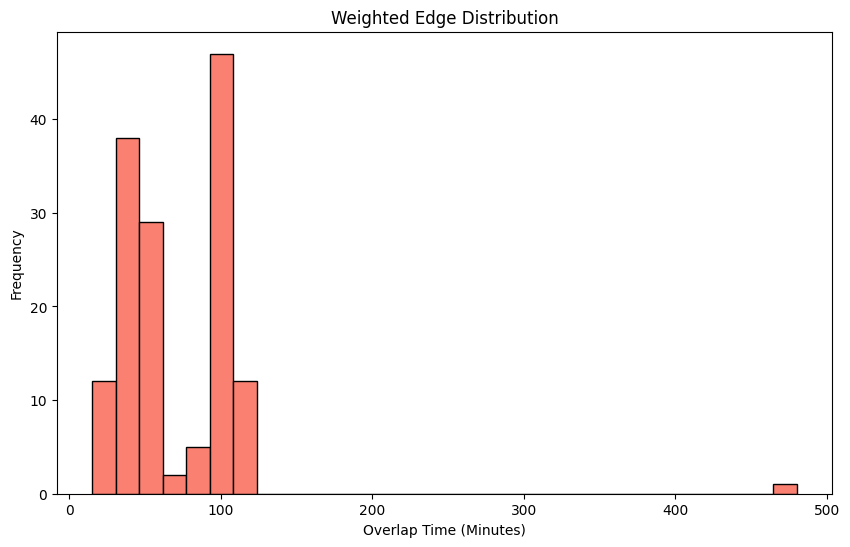

In [54]:
create_weighted_time_overlap_graph(weekday='Monday', node_size=3,semester='HS24', study_program='Major 90 Biology---Master of Science Faculty of Science (120)') 

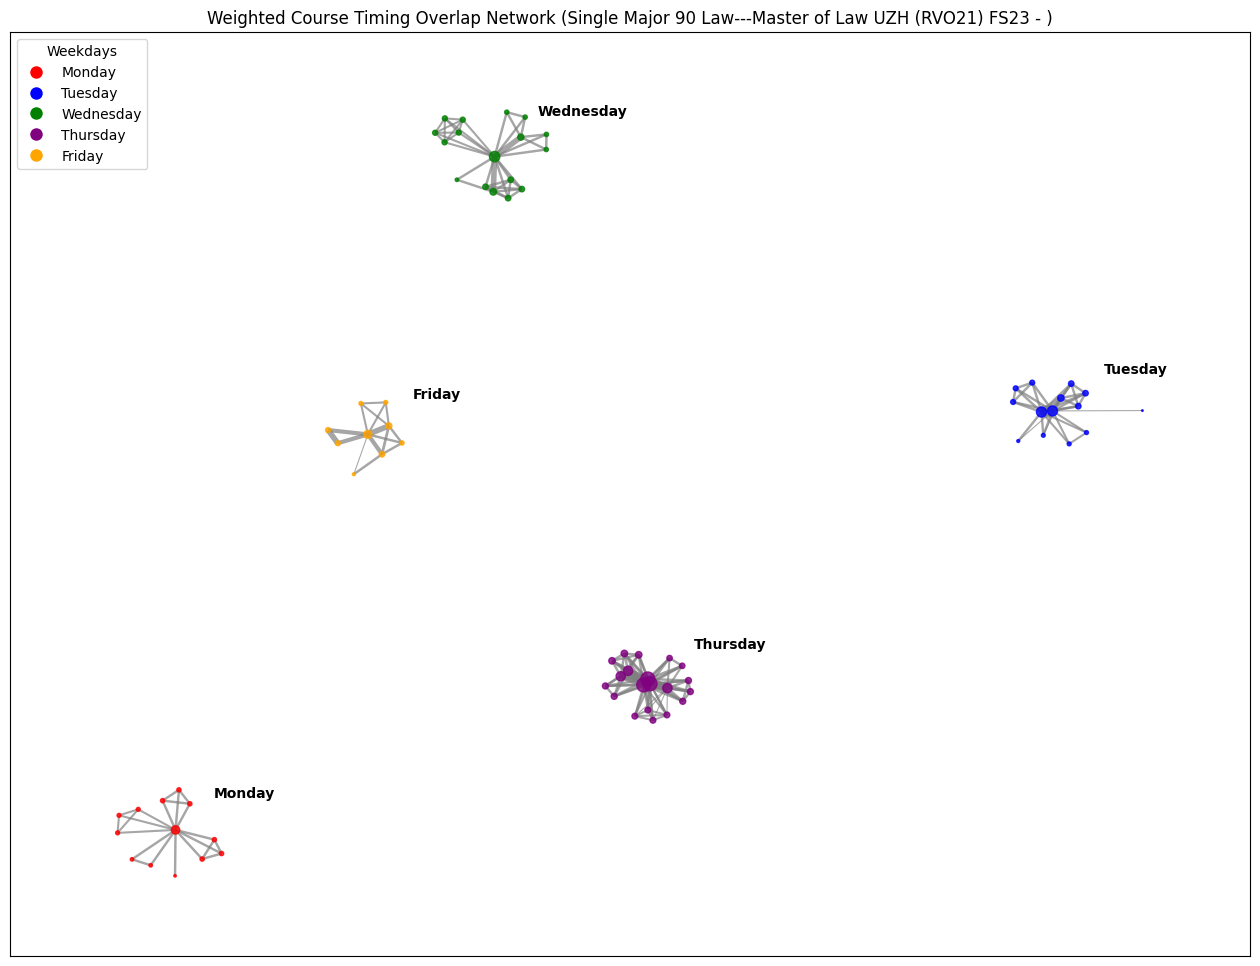

Length DF:  75
Number of nodes:  73
Number of edges:  204
Courses with highest weighted degrees:

Course: Seminar: Grundfragen des Einkommens- und Vermögenssteuerrechts - Total Overlap Time: 3375.0
Course: Seminar: Big Tech: rechtsfreier Raum oder Überregulierung? - Total Overlap Time: 3375.0
Course: Seminar: Privacy: Technical and Legal Perspectives - Total Overlap Time: 3375.0
Course: Seminar: Legal History Seminar - Total Overlap Time: 1875.0
Course: Seminar: Straf- und zivilrechtliche Verantwortlichkeit bei Bergunfällen - Total Overlap Time: 1740.0

Top 5 Courses by Weighted Degree Centrality:
Course: Seminar: Grundfragen des Einkommens- und Vermögenssteuerrechts - Weighted Degree Centrality: 0.0688
Course: Seminar: Big Tech: rechtsfreier Raum oder Überregulierung? - Weighted Degree Centrality: 0.0688
Course: Seminar: Privacy: Technical and Legal Perspectives - Weighted Degree Centrality: 0.0688
Course: Seminar: Legal History Seminar - Weighted Degree Centrality: 0.0382
Course: Sem

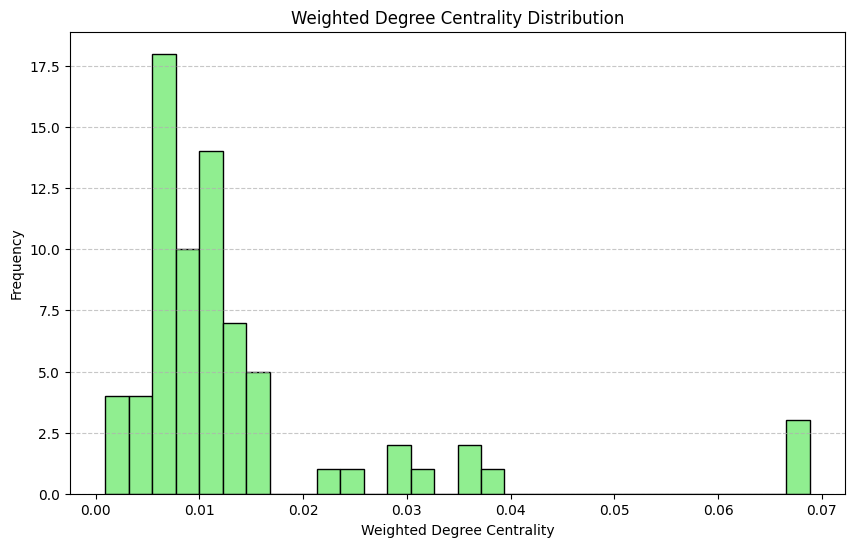

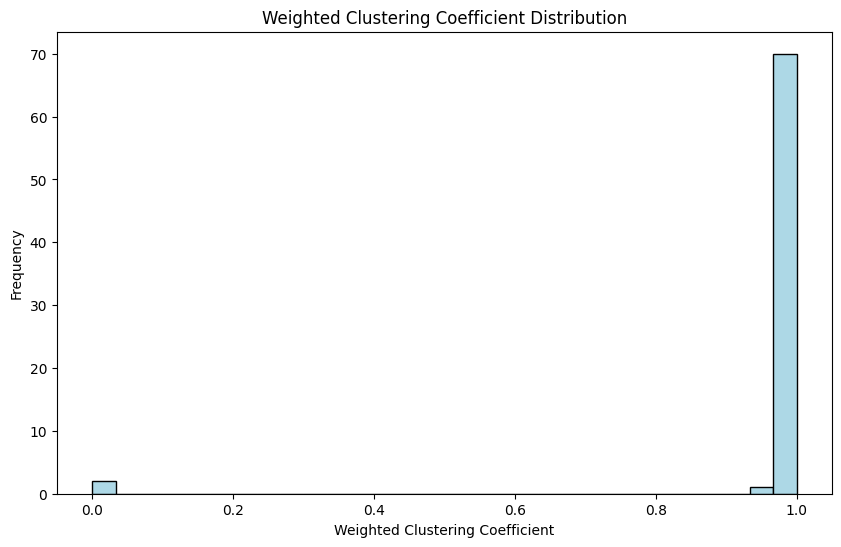

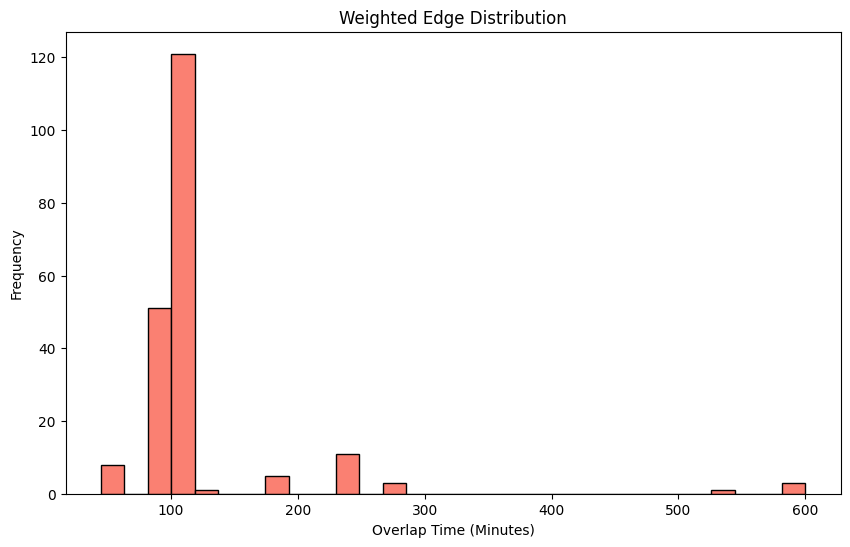

In [55]:
create_weighted_time_overlap_graph(weekday='', semester= 'FS23', node_size=0.03, study_program='Single Major 90 Law---Master of Law UZH (RVO21)') 

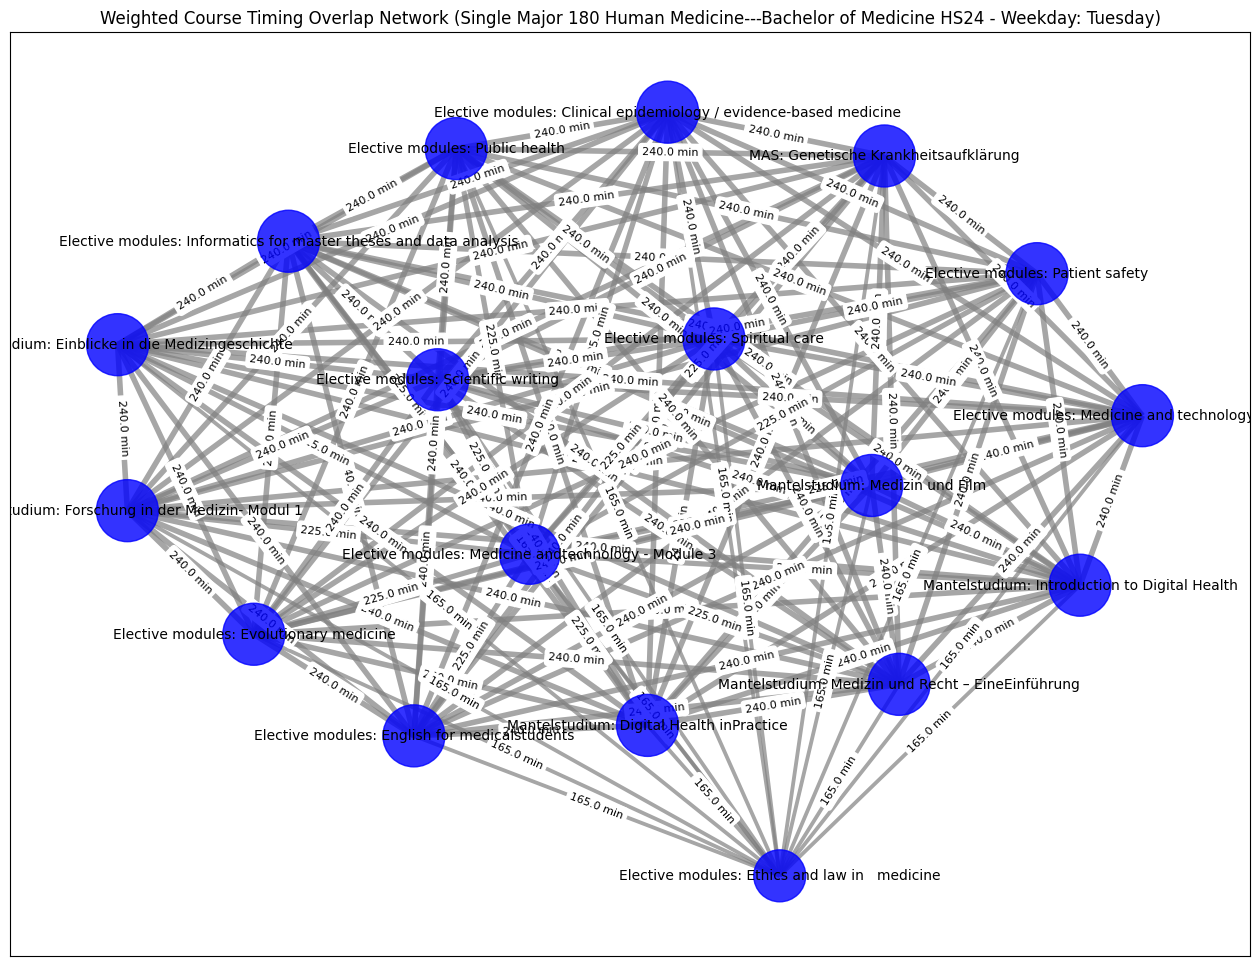

Length DF:  20
Number of nodes:  18
Number of edges:  153
Courses with highest weighted degrees:

Course: Mantelstudium: Introduction to Digital Health - Total Overlap Time: 3990.0
Course: Elective modules: Informatics for master theses and data analysis - Total Overlap Time: 3990.0
Course: Mantelstudium: Digital Health inPractice - Total Overlap Time: 3990.0
Course: Mantelstudium: Einblicke in die Medizingeschichte - Total Overlap Time: 3990.0
Course: Mantelstudium: Forschung in der Medizin- Modul 1 - Total Overlap Time: 3990.0

Top 5 Courses by Weighted Degree Centrality:
Course: Mantelstudium: Introduction to Digital Health - Weighted Degree Centrality: 0.0567
Course: Elective modules: Informatics for master theses and data analysis - Weighted Degree Centrality: 0.0567
Course: Mantelstudium: Digital Health inPractice - Weighted Degree Centrality: 0.0567
Course: Mantelstudium: Einblicke in die Medizingeschichte - Weighted Degree Centrality: 0.0567
Course: Mantelstudium: Forschung in 

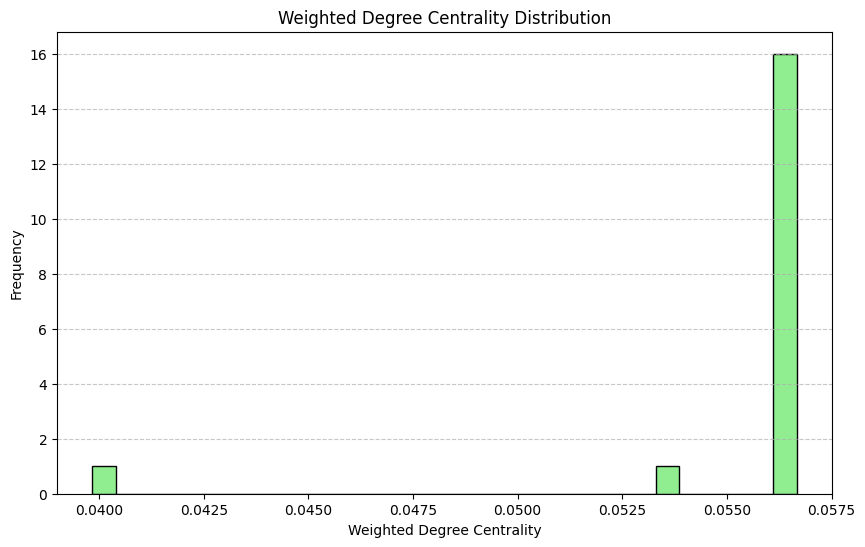

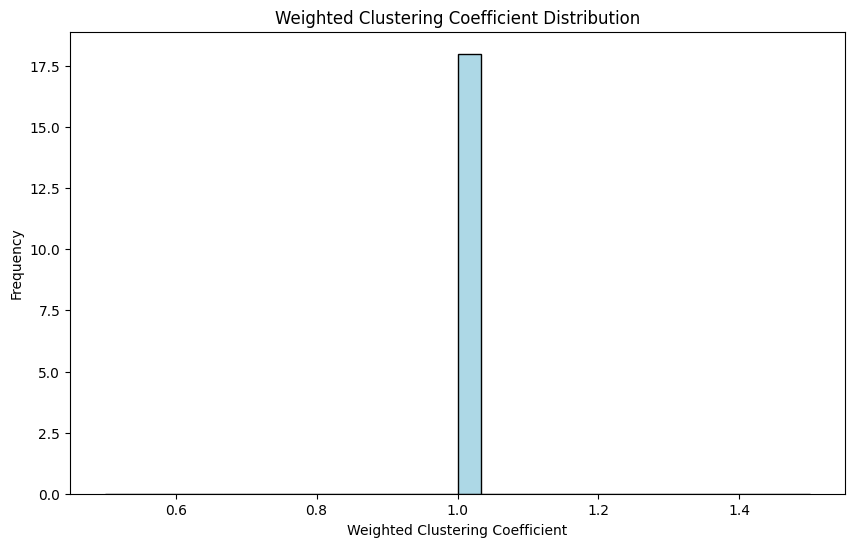

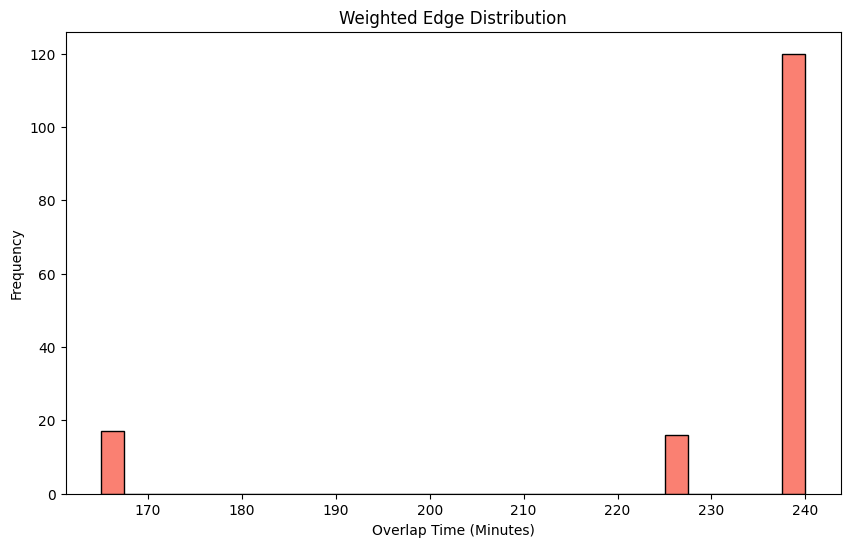

In [56]:
create_weighted_time_overlap_graph(weekday='Tuesday', semester= 'HS24', node_size=0.5,study_program='Single Major 180 Human Medicine---Bachelor of Medicine')  

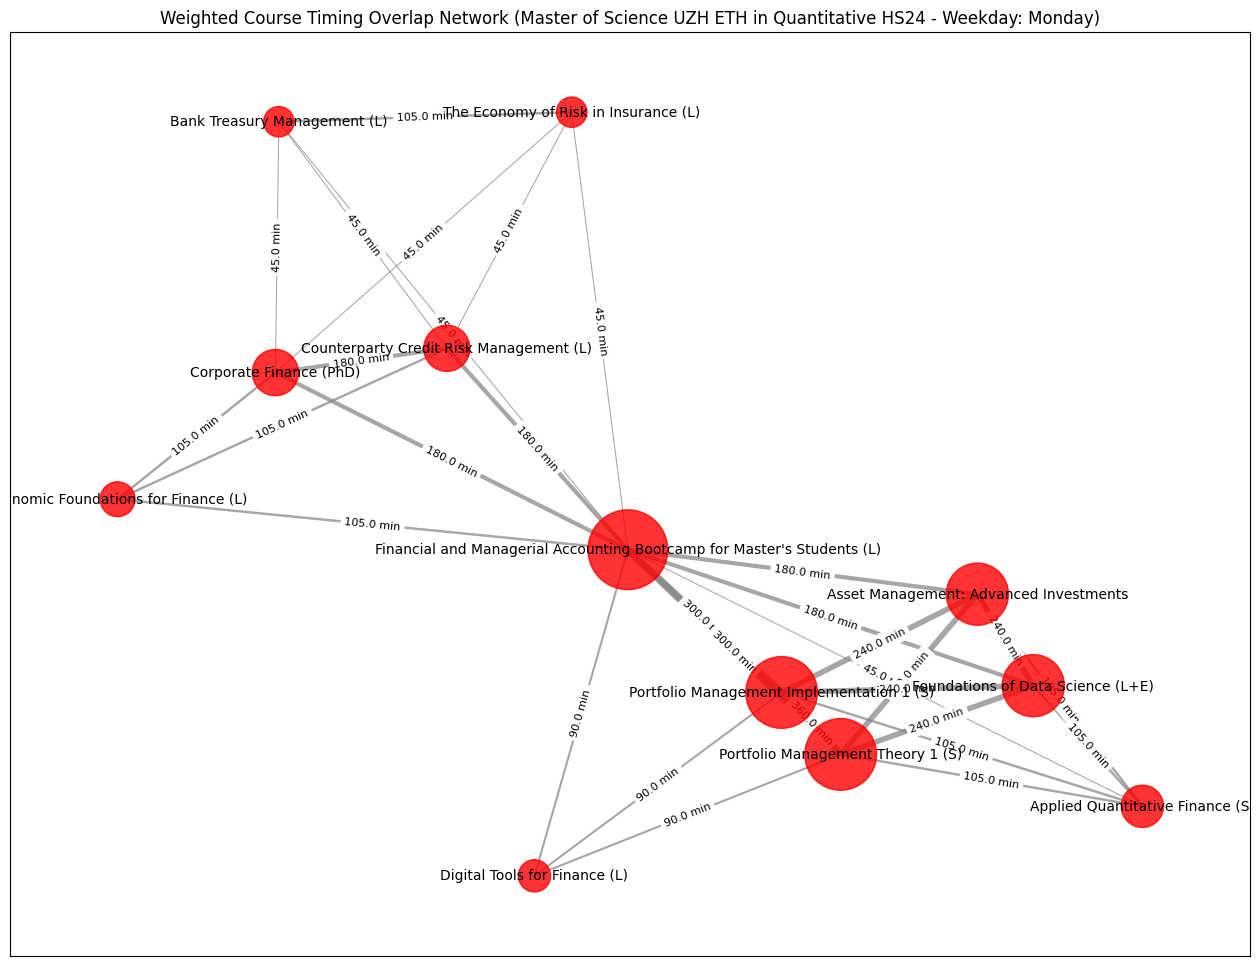

Length DF:  12
Number of nodes:  12
Number of edges:  31
Courses with highest weighted degrees:

Course: Financial and Managerial Accounting Bootcamp for Master's Students (L) - Total Overlap Time: 1650.0
Course: Portfolio Management Implementation 1 (S) - Total Overlap Time: 1335.0
Course: Portfolio Management Theory 1 (S) - Total Overlap Time: 1335.0
Course: Asset Management: Advanced Investments - Total Overlap Time: 1005.0
Course: Foundations of Data Science (L+E) - Total Overlap Time: 1005.0

Top 5 Courses by Weighted Degree Centrality:
Course: Financial and Managerial Accounting Bootcamp for Master's Students (L) - Weighted Degree Centrality: 0.1839
Course: Portfolio Management Implementation 1 (S) - Weighted Degree Centrality: 0.1488
Course: Portfolio Management Theory 1 (S) - Weighted Degree Centrality: 0.1488
Course: Asset Management: Advanced Investments - Weighted Degree Centrality: 0.1120
Course: Foundations of Data Science (L+E) - Weighted Degree Centrality: 0.1120

Top 5 

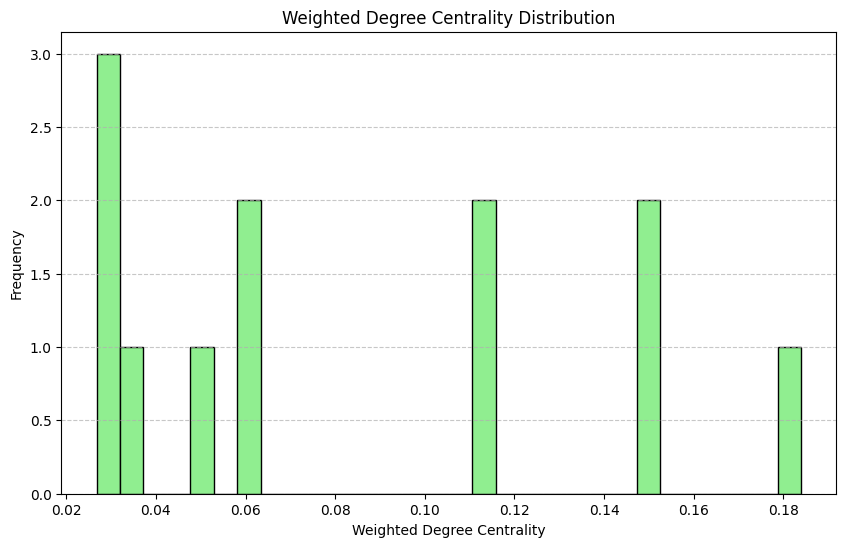

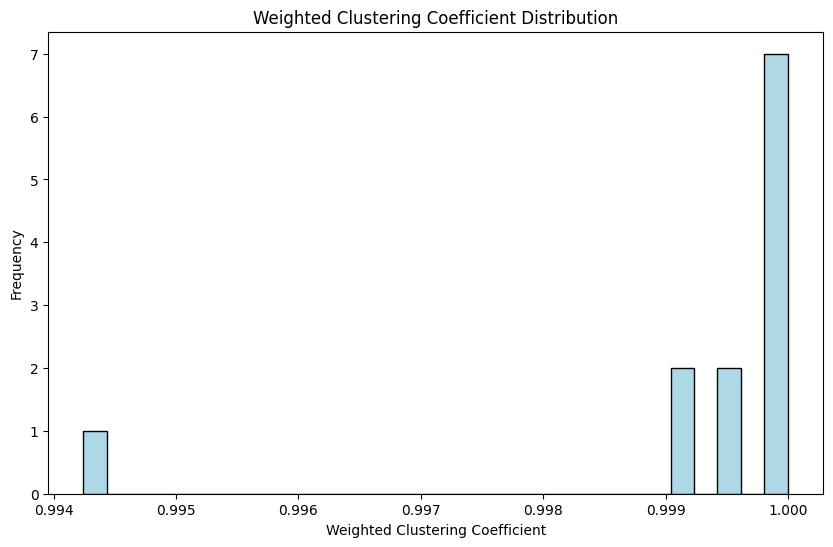

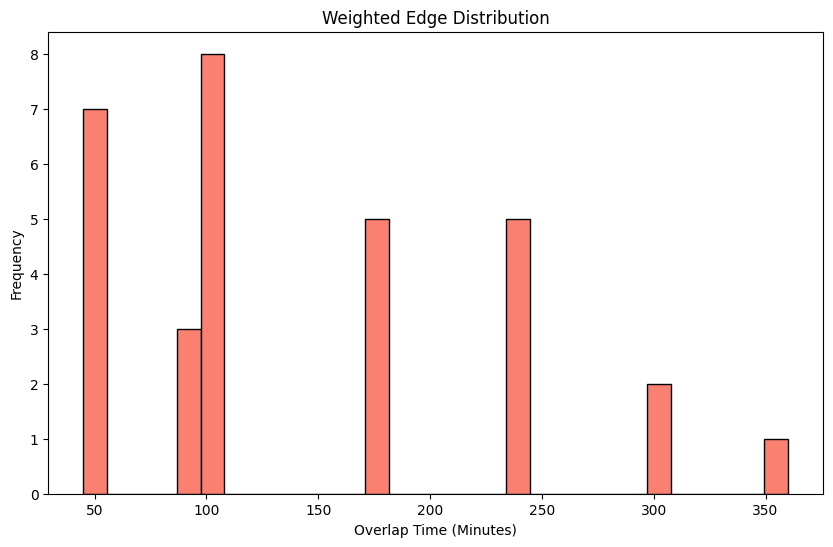

In [57]:

create_weighted_time_overlap_graph(weekday='Monday', semester= 'HS24', node_size=2,study_program='Master of Science UZH ETH in Quantitative')  